In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. bayseian modeling
binominal distribution
nomal distribution

In [3]:
import stan

In [4]:
import nest_asyncio #this library is important to use pystan

nest_asyncio.apply()

In [5]:
import pandas as pd
import csv

In [6]:
import scipy.stats as stats

In [7]:
## import data

df = pd.read_csv('./db/diabetes.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_81100/200711133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose,color='r')


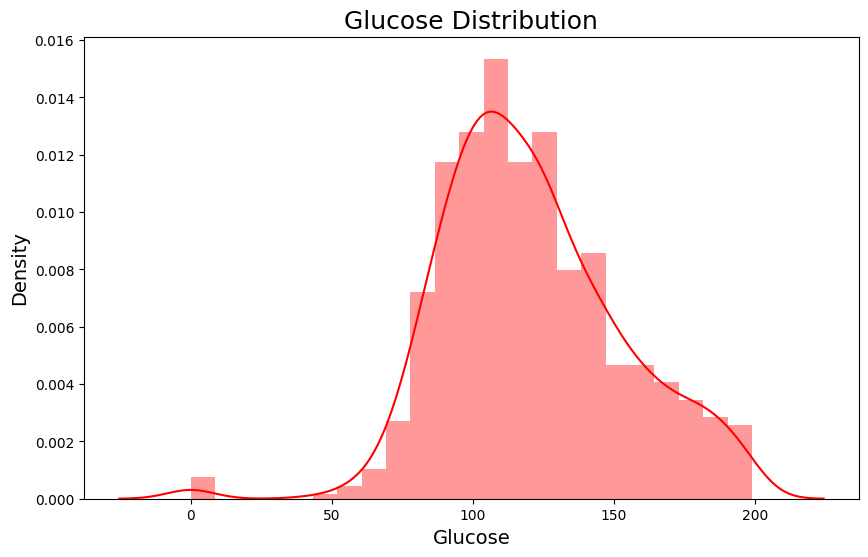

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df.Glucose,color='r')
plt.title('Glucose Distribution',size=18)
plt.xlabel('Glucose',size=14)
plt.ylabel('Density',size=14)
plt.show()

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# print(df.loc[:, 'Outcome'].values)

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

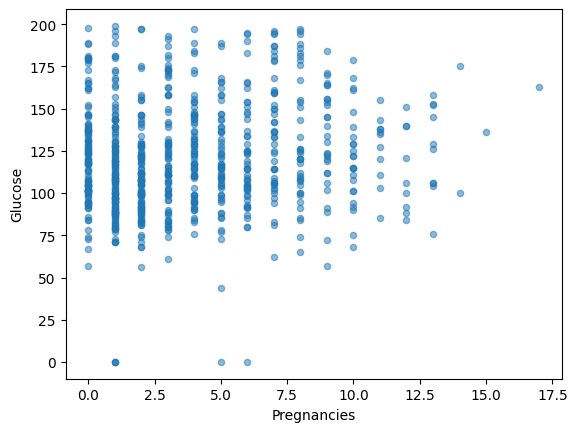

In [13]:
df.plot.scatter(x="Pregnancies", y="Glucose", alpha=0.5)

In [14]:
len(df)

768

In [15]:
df["high_preg"] = df.apply(lambda x: 1 if x["Pregnancies"]>3 else 0, axis=1)
df = df.astype(int)


In [16]:
## hypothesis setting
### H1. the number of pregnancies affect increase of glucose.
### H0. the number of pregnancies affect increase of glucose.

""""
simple linear regression model 
""""

SyntaxError: EOL while scanning string literal (67612394.py, line 7)

In [23]:
stan_code = """
data {
  int<lower=0> N;
  vector[N] glucose;
  int<lower=0> pregnancies[N];
}

parameters {
  // prob of success 
  real alpha;
  real beta_pregnancies;
  real<lower=0> sigma;
}

model {
  //prior 
  alpha ~ normal(0, 10);
  beta_pregnancies ~ normal(0, 10);
  sigma ~ cauchy(0, 5);

  glucose ~ normal(alpha + beta_pregnancies * to_vector(pregnancies), sigma);
}
"""

In [24]:
data = {
"N": len(df), 
"pregnancies": df.loc[:, "Pregnancies"].values, 
"glucose": df.loc[:, "Glucose"].values,
}

In [3]:
model = stan.build(stan_code, data= data)

NameError: name 'stan' is not defined

In [2]:
fit = model.sample(num_chains=4, num_samples=1000)

NameError: name 'model' is not defined

In [27]:
df = fit.to_frame()

In [28]:
df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_pregnancies,sigma
draws,,,,,,,,,,
0,-3105.860053,0.990364,0.518884,3.0,7.0,0.0,3108.140574,116.010080,1.093805,31.782244
1,-3105.326421,0.813957,0.480446,3.0,7.0,0.0,3106.969483,113.799333,1.340351,30.745481
2,-3104.996507,0.924425,0.518144,2.0,3.0,0.0,3105.703578,114.507908,1.637691,32.424895
3,-3104.496585,0.986248,0.463289,3.0,7.0,0.0,3106.120726,114.212305,1.694494,31.808317
4,-3104.882453,0.973850,0.518884,3.0,7.0,0.0,3107.363608,113.360483,1.619830,32.897642


## 3. ploting

In [29]:
posterior_samples = df["beta_pregnancies"]  # array with shape (8, 4000)

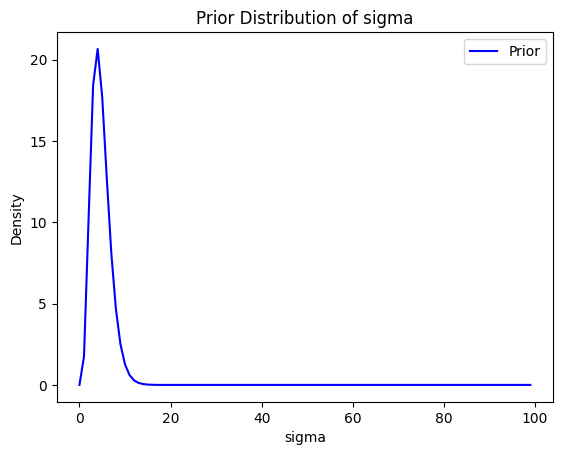

In [31]:
alpha = 5
beta = 100
x = np.linspace(0, 1, 100)

prior_density = stats.beta.pdf(x, alpha, beta)
plt.plot(prior_density, label='Prior', color='blue')
plt.title('Prior Distribution of sigma')
plt.xlabel('sigma')
plt.ylabel('Density')
plt.legend()


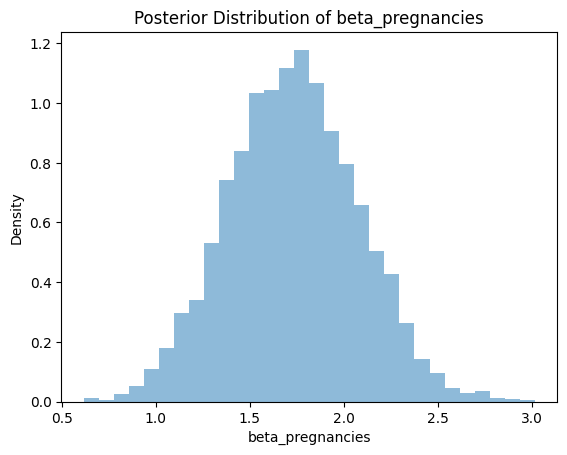

In [30]:

posterior_samples.plot.hist(bins=30, density=True, alpha=0.5)
plt.title('Posterior Distribution of beta_pregnancies')
plt.xlabel('beta_pregnancies')
plt.ylabel('Density')
plt.show()

## 0. delete cache of model

In [20]:
# import the relevant modules
import shutil
import httpstan.models
import httpstan.cache

In [21]:
httpstan.cache.list_model_names()

['models/jfsftn6k', 'models/qcxogyty']

In [23]:
httpstan.cache.delete_model_directory('models/jfsftn6k') ## add the model pointer you want to remove